# Chocolate bar ratings

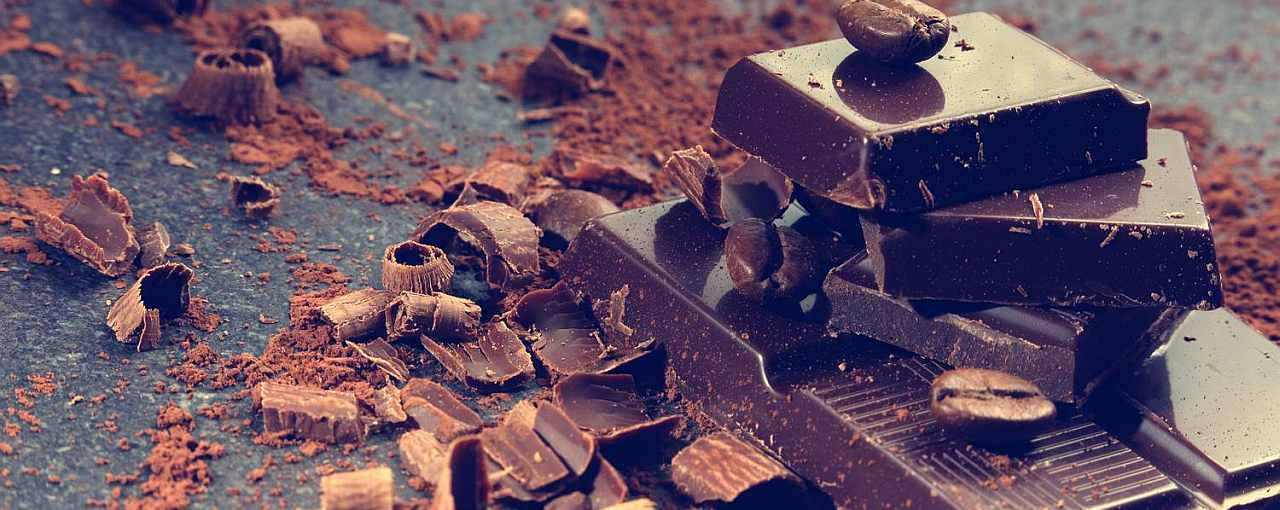

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
%matplotlib inline
sns.set()

In [ ]:
# loading dataframe chocolate.csv into df
df = pd.read_csv('/kaggle/input/chocolate.csv')

In [ ]:
# viewing first five records of dataset df
df.head()

In [ ]:
# let's rename the columns 
df.columns = ['company','barName','ref','reviewYear','cocoaPercent','location','rating','beanType','beanOrigin']
df.head()

In [ ]:
# let's get some information about the dataset
df.info()

### We see above the dataset contains total 1500 records and 9 columns and three types of datatypes we have int64,float64 and object. Also the number of missing data if we have.

## Handling missing data

In [ ]:
# let's observe the dataset to see if we really don't have missing data
df

In [ ]:
#we have a lot of missing data in beanType column but we don't get that much number of missing data,
#it means there's some data. let's check it by displaying the data from origin column at index 1
df.beanOrigin[1]

**So we have data there but it seems like as if it's empty. Let's make these null**

In [ ]:
df.replace('\xa0', np.nan, inplace=True) #it replaces wherethere is found in whole dataset

In [ ]:
#let's see how much data we have missing now
df.isnull().sum()

In [ ]:
# let's visualize the missing data
plt.figure(figsize=(8,4))
df.isnull().sum().plot.bar()
plt.show()

**Almost half of data is missing in beanType column and 62 missing in origin column. let's deal with them**

In [ ]:
# filling the missing values with most frequent values in beanType and origin column 
df.beanType.fillna(df.beanType.mode()[0], inplace=True)
df.beanOrigin.fillna(df.beanOrigin.mode()[0], inplace=True)

In [ ]:
# checking missing values if remaining
df.isnull().sum()

In [ ]:
df.head()

**In cocoaPercent column we have % with data so need to remove it and change it's datatype from string to float**

In [ ]:
df.cocoaPercent=df.cocoaPercent.str.replace('%','')
df.cocoaPercent=df.cocoaPercent.astype('float64')
df.cocoaPercent = (df.cocoaPercent.values)/100
df.head()

# Summary

In [ ]:
# from summmary we get the maximium information about the dataset like number of unique values, data distributioin
# and ranges of data along with their average values
df.describe(include='all')

## Distribution of data and outliers

### ref

In [ ]:
sns.distplot(a=df.ref, label=f'skewness:{df.ref.skew():10.4f},\nkurtosis: {df.ref.kurt():10.4f}')
plt.legend()
plt.show()

In [ ]:
sns.boxplot(df.ref)
plt.show()

**skewness tells that data is very little left skewed and kurtosis tells that there are no outliers becuase the tails are not thin and distribution is flat not peaked**

### reviewYear

In [ ]:
sns.distplot(a=df.reviewYear, label=f'skewness:{df.reviewYear.skew():10.4f},\nkurtosis: {df.reviewYear.kurt():10.4f}')
plt.legend()
plt.show()

In [ ]:
sns.boxplot(df.reviewYear)
plt.show()

**In this column distribution is left skewed more than the average and there are no outliers**

### cocoaPercent

In [ ]:
sns.distplot(a=df.cocoaPercent, label=f'skewness:{df.cocoaPercent.skew():10.4f},\nkurtosis: {df.cocoaPercent.kurt():10.4f}')
plt.legend()
plt.show()

In [ ]:
# visualizing the outliers through boxplot
sns.boxplot(x=df.cocoaPercent)
plt.show()

**Cocoa percent in chocolate bars is around 70-80% and the distribution is slightly positively distributed and there are a lot of outliers in the data**

**Data less than 0.53 and more than 0.95 we consider outliers and rest of the data seems to be so close with values so no need to remove them**


In [ ]:
df.drop(df[(df.cocoaPercent.values > 0.95) | (df.cocoaPercent.values <= 0.53)].index, inplace=True)

### rating

In [ ]:
sns.distplot(a=df.rating, label=f'skewness:{df.rating.skew():10.4f},\nkurtosis: {df.rating.kurt():10.4f}')
plt.legend()
plt.show()

In [ ]:
sns.boxplot(x=df.rating)
plt.show()

**Here also distribution is left skewed above average and there are also a few outliers in rating column, let's remove these**

In [ ]:
# let's remove the outliers
df.drop(df[(df.rating.values < 2.0) | (df.rating.values > 4.5)].index, inplace=True)

## Correlation

In [ ]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

### Coca percent and their rating

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.cocoaPercent,df.rating)
plt.title('Rating according to cocoa percent')
plt.show()

### Origins whose coca beans are most liked

In [ ]:
plt.figure(figsize=(10,25))
df.groupby(['beanOrigin'])['rating'].max().plot(kind='barh')
plt.xlabel('chocolate rating')
plt.title('Origins with highest rating')
plt.show()

### Countries with highest Number of vendors

In [ ]:
plt.figure(figsize=(10,12))
df.location.value_counts().plot(kind='barh',)
plt.xlabel('count of chocolate bars')
plt.ylabel('countries')
plt.show()